## End to End Machine Learning for Binary Classification and Rain Prediction
### Part 2: Evaluation metrics for Classification

This Jupyter Notebook covers the solution implementation of the **second** of 3-Project series on End to End ML for Binary Classification.

We are covering the following topics here:

1. Accuracy Score and Confusion Matrix
2. ROC Curve and AUC Score
3. K-Fold Cross-Validation and Hyperparameter Tuning using GridSearchCV

Each of these topics is a milestone is a milestone in the second project.

### Data

We are using the [Rainfall prediction dataset from Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) which cotains daily weather observations from numerous Austrailian weather stations.

### Problem Statement
We aim to answer a very simple question - Whether it will rain tomorrow in Australia or not.

### Importing Libraries

In [1]:
##importing libraries
import numpy as np  #for algebraic operations on arrays
import pandas as pd  #for data exploration and manipulation


##plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading the cleaned dataset

In [2]:
#Read the dataset
X_train=pd.read_csv('data/X_train.csv')
X_test=pd.read_csv('data/X_test.csv')
y_train=pd.read_csv('data/y_train.csv')
y_test=pd.read_csv('data/y_test.csv')

In [3]:
#Print the shapes to see if the data is alright
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (113754, 119)
Shape of y_train: (113754, 2)
Shape of X_test: (28439, 119)
Shape of y_test: (28439, 2)


Notice that the labels (y_train and y_test) have 2 columns, but we only require 1, i.e., either 'Yes' or 'No'. Likewise, there were supposed to be 118 features. What went wrong?

In [4]:
y_train.head()

,Unnamed: 0,RainTomorrow
0,103319,No
1,36624,No
2,101438,No
3,118995,No
4,40580,Yes


In [5]:
X_train.head()

,Unnamed: 0,Cloud3pm,Cloud9am,Day,Evaporation,Humidity3pm,Humidity9am,Location=Adelaide,Location=Albany,Location=Albury,...,WindGustDir=SSE,WindGustDir=SSW,WindGustDir=SW,WindGustDir=W,WindGustDir=WNW,WindGustDir=WSW,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Year
0,0,0.125,0.777778,0.233333,0.743119,0.20,0.656566,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.395349,0.649123,0.400000,0.2
1,1,0.625,0.777778,0.800000,0.275229,0.32,0.767677,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.186047,0.157895,0.109091,0.4
2,2,1.000,0.666667,0.033333,0.183486,0.58,0.797980,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.186047,0.333333,0.163636,0.6
3,3,0.500,0.555556,0.266667,0.577982,0.23,0.444444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.240310,0.192982,0.200000,0.5
4,4,0.375,0.555556,0.400000,0.293578,0.68,0.757576,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.209302,0.385965,0.036364,0.8


It looks like the old index values from the .csv file is now the first column. Let's fix it.

In [6]:
X_train=X_train.iloc[:,1:]
X_test=X_test.iloc[:,1:]
y_train=y_train["RainTomorrow"]
y_test=y_test["RainTomorrow"]

In [7]:
X_train.head()

,Cloud3pm,Cloud9am,Day,Evaporation,Humidity3pm,Humidity9am,Location=Adelaide,Location=Albany,Location=Albury,Location=AliceSprings,...,WindGustDir=SSE,WindGustDir=SSW,WindGustDir=SW,WindGustDir=W,WindGustDir=WNW,WindGustDir=WSW,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Year
0,0.125,0.777778,0.233333,0.743119,0.20,0.656566,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.395349,0.649123,0.400000,0.2
1,0.625,0.777778,0.800000,0.275229,0.32,0.767677,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.186047,0.157895,0.109091,0.4
2,1.000,0.666667,0.033333,0.183486,0.58,0.797980,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.186047,0.333333,0.163636,0.6
3,0.500,0.555556,0.266667,0.577982,0.23,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.240310,0.192982,0.200000,0.5
4,0.375,0.555556,0.400000,0.293578,0.68,0.757576,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.209302,0.385965,0.036364,0.8


In [8]:
y_train.head()

0     No
1     No
2     No
3     No
4    Yes
Name: RainTomorrow, dtype: object

### Fitting the Model on the data
As done in project 1, let's fit the dataset on the Logistic Regression Model

In [9]:
#Import the class
from sklearn.linear_model import LogisticRegression

#Instantiate the model class
logreg = LogisticRegression(solver='liblinear', random_state=0)

#Train the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### 1. Accuracy Score and Confusion Matrix

#### (a) Accuracy Score

The main purpose of evaluating models is to understand how good the model is and compare with other models to pick the best one for the problem at hand.

Now that we have fit our model, it is time to predict labels for y_test. After obtaining the predictions, we need to evaluate the predicitons. Note that when we talk about model accuracy, we generally refer to the test set and not the train set since we want to base the model on data it has not seen yet. At the same time, we will also be predicting labels for X_train, the data that the model was fit on in order to understand if our model has overfit the training data by comparing it to the model accuracy on the test set.

The accuracy of a binary classification model is nothing but the percentage of correct predictions it makes. This is the simplest way to evaluate a classifier: by counting the number of cases in which our model turned out to be right, we can learn a lot about the model's behavior and quality.

**Overfitting**: This phenomenon occurs when the model has fit 'too perfectly' on the train set, as a result of which it performs poorly on data it has not come across (the test set). It is indicated by a large difference in training set accuracy and testing set accuracy. This leads to high variance. The opposite of overfitting is **underfitting** where the model has not fit well on the training set itself, leading to a high bias.

![Image](https://media-exp1.licdn.com/dms/image/C5612AQHQ4RWFA1BO6Q/article-cover_image-shrink_720_1280/0?e=1605744000&v=beta&t=v9VsjM_Pk5K8nDe4yqhdVA7We6lB7lrmyaA9T5g-YBc)

**Note**: In the image, validation error refers to the test error in our case.

In [10]:
##predicting the result for both the train set and the test set
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [11]:
##model accuracy
from sklearn.metrics import accuracy_score

#Let's check the accuracy score for both the training set and the testing set
print('Accuracy score for train data: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Accuracy score for test data: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Accuracy score for train data: 0.8480
Accuracy score for test data: 0.8489


Since the accuracy score on the test data is very close to the accuracy score on the train data, we can safely say that overfitting has not taken place, meaning we have a low variance model. As for underfitting, while ~85% is probably a good score, we cannot say for sure whether the model has low bias, for all we know we could probably change a few hyperparameters and get a much better accuracy.

**Note**: Logistic regression does not actually say if it will rain or not, in fact, it provides the probability of raining. If the probability is >= 0.5, the 'predict' method will predict rainfall. The 'predict_proba' method gives the probability values.

In [12]:
##probabilities for positive class
y_pred_test_probs = logreg.predict_proba(X_test)[:,1]

y_pred_test_probs

array([0.80658277, 0.06055644, 0.15584481, ..., 0.03178373, 0.77339503,
       0.95309868])

What if we want to change our threshold from 0.5? For example, for a cancer predicition model, we would want to predict it as positive even if the probability is at least 0.3. The following code shows how we can do that - of course, on our dataset itself. Not only this, but it also affects the precision-recall trade-off as shown later.

In [13]:
BoolArray=logreg.predict_proba(X_test)[:,1]>=0.3
Predictions=np.array(['Yes' if val==True else 'No' for val in BoolArray])
Predictions
print('Accuracy score for test data: {0:0.4f}'.format(accuracy_score(y_test, Predictions)))

Accuracy score for test data: 0.8243


Notice that the  the accuracy has dropped, but it may vary from model to model.

Next, although we obtained an accuracy of ~85%, it's a good idea to compare it to a dummy baseline. A dummy baseline is one in which we calculate the accuracy of a model that always predicts 'Yes' or always predicts 'No'. This gives us an idea of how better our model is compared to this 'dummy' model.

In [14]:
YesDummyModel = np.repeat('Yes',len(y_test))
NoDummyModel = np.repeat('No',len(y_test))

In [15]:
print('Accuracy score for dummy model predicting "Yes": {0:0.4f}'.format(accuracy_score(y_test, YesDummyModel)))
print('Accuracy score for dummy model predicting "No": {0:0.4f}'.format(accuracy_score(y_test, NoDummyModel)))

Accuracy score for dummy model predicting "Yes": 0.2216
Accuracy score for dummy model predicting "No": 0.7784


Notice that the dummy model that predicts "No" us just around 7% worse than our model. Not much of a difference for an extremely trivial model. This leads us to the need for a **confusion matrix**. 

#### (b) Confusion Matrix
As seen above, sometimes accuracy may not be the best indicator of how good our model is, particularly when our model has a large percentage of one class (as in the case of 'No' for our dataset) - an imbalanced dataset.

![Image](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

As seen in the image, we split our predicted values into one of four classes, depending on if the predicted value is "Yes" or "No" and if the actual value is "Yes" or "No". As a result we have several different metrics which, each of which have their unique advantages.

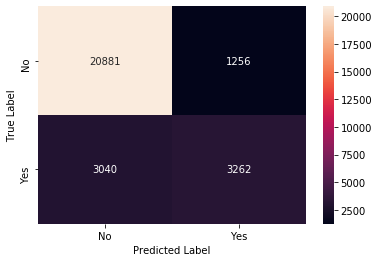


               precision    recall  f1-score   support

          No       0.87      0.94      0.91     22137
         Yes       0.72      0.52      0.60      6302

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439



In [16]:
from sklearn.metrics import confusion_matrix, classification_report

#Plotting the Confusion Matrix
cm = confusion_matrix(y_test,y_pred_test)
cmdf=pd.DataFrame(cm,index=["No","Yes"],columns=["No","Yes"])
fig,ax=plt.subplots(1,1)
sns.heatmap(cmdf,annot=True,fmt='d',ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print("\n",classification_report(y_test,y_pred_test))

Now that we have used a confusion matrix, we can observe that we have a low precision and recall and subsequently low F1-score for "Yes" (F1-score is the harmonic mean of precision and recall). Also, the model does poorly when predicting an actual rainy day. By altering certain hyperparameters, one could ensure a suitable trade-off if needed. 

In our weather forecast case, this may be a serious problem since it is (perhaps) worse off to say that it is not going to rain but it actually rains instead of wrongly predicting that it's going to rain - leading to people getting unexpectly drenched in the former, and the worst case scenario in the latter case being that people carried their umbrellas unneccesary (Better safe than sorry!). **So ideally we would want to reduce the type 2 error, which will increase the type 1 error** - which we would consider a fair trade.

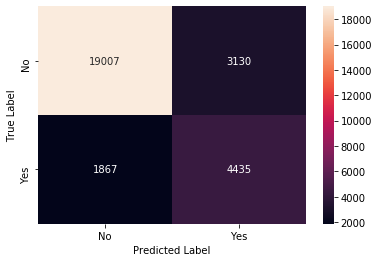

              precision    recall  f1-score   support

          No       0.91      0.86      0.88     22137
         Yes       0.59      0.70      0.64      6302

    accuracy                           0.82     28439
   macro avg       0.75      0.78      0.76     28439
weighted avg       0.84      0.82      0.83     28439



In [17]:
#Set the threshold value
threshold = 0.3

BoolArray=logreg.predict_proba(X_test)[:,1]>=threshold
predictions=np.array(['Yes' if val==True else 'No' for val in BoolArray])

#Plotting the Confusion Matrix
cm = confusion_matrix(y_test,predictions)
cmdf=pd.DataFrame(cm,index=["No","Yes"],columns=["No","Yes"])
fig,ax=plt.subplots(1,1)
sns.heatmap(cmdf,annot=True,fmt='d',ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_test,predictions))

Setting a threshold value of 0.3 seemed to get us to an acceptable set of values

### 2) ROC Curve and AUC Score

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification **thresholds**. This curve plots two parameters:

1) **True Positive Rate (or recall)**  
2) **False Positive Rate**

TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)

We shall compare three different models in order to understand the relation between TPR and FPR. The first one is **our logistic regression model**, the second one is a **random baseline model** (with y labels assigned random values from 0 to 1) and an **ideal model** (which always makes correct decisions - in which "Yes" always has a higher probability than "No"). For each model, 2 plots are drawn, the first being the variation of the TPR and FPR curves as a function of threshold, and the second plot being the TPR vales vs the FPR values for different threshold values (the ROC curve). By looking at the ideal and baseline curves, you should understand the difference between perfect and random, and our logistic regression model falling in between.

First, we shall create a function to obtain the TPR and FPR values given the y_test values and the predicted values

In [18]:
def tpr_fpr_dataframe(y_pred, y_val):
    
    #Create an empty list in order to append the confusion matrix values
    scores = []
    
    #Create a list containing many threshold values in between 0 and 1
    thresholds = np.linspace(0, 1, 101)
    
    #Loop through each threshold value to obtain the individual confusion matrix values
    for t in thresholds:
        #True Positive
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        #False Positive
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        #False Negative
        fn = ((y_pred < t) & (y_val == 1)).sum()
        #True Negative
        tn = ((y_pred < t) & (y_val == 0)).sum()
        #Append these values to scores for a particular value of 't'
        scores.append((t, tp, fp, fn, tn))
        
    #Create a datadram from scores    
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    
    #Calculate the TPR and FPR values for all the threshold values
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [22]:
#To convert the y_test labels into 1s and 0s - needed for the following steps
y_test_num=np.array([1 if val=='Yes' else 0 for val in y_test])

#### Model 1: Our Logistic Regression Model

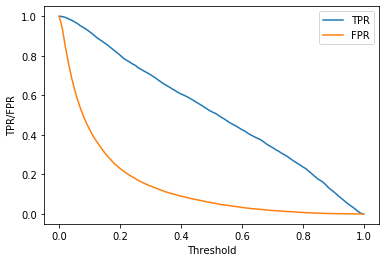

In [23]:
#Obtain the FPR and TPR dataframe
df_scores = tpr_fpr_dataframe(y_pred_test_probs,y_test_num)

#Plot of TPR/FPR vs. Threshold
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.xlabel('Threshold')
plt.ylabel('TPR/FPR')
plt.legend()
plt.show()

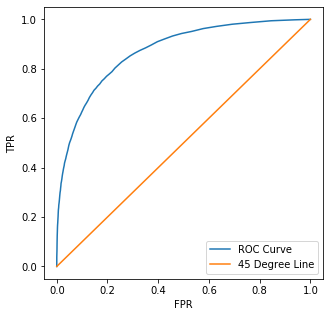

In [24]:
#Plot of TPR vs FPR
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr,label='ROC Curve')
plt.plot([0, 1], [0, 1],label='45 Degree Line')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

#### Model 2: Baseline Model (Random)

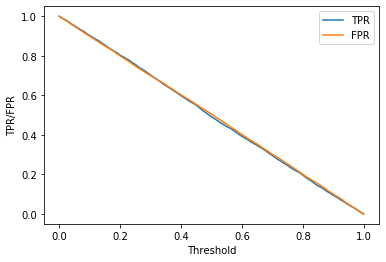

In [25]:
#Creation of y_rand which is uniformly random predictions between 0 and 1.
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_test))

#Obtain the FPR and TPR dataframe
df_rand=tpr_fpr_dataframe(y_rand,y_test_num)

#Plot of TPR/FPR vs. Threshold
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.xlabel('Threshold')
plt.ylabel('TPR/FPR')
plt.legend()
plt.show()

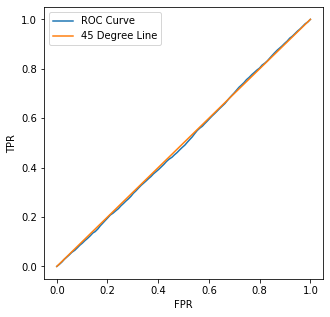

In [26]:
#Plot of TPR vs FPR
plt.figure(figsize=(5, 5))
plt.plot(df_rand.fpr, df_rand.tpr,label='ROC Curve')
plt.plot([0, 1], [0, 1],label='45 Degree Line')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

#### Model 3: Ideal Model

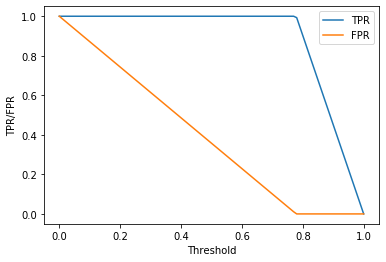

In [27]:
#Creation of predictions in which the positive classes and negative classes are separated perfectly
num_neg = (y_test_num == 0).sum()
num_pos = (y_test_num == 1).sum()
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

#Obtain the FPR and TPR dataframe
df_ideal=tpr_fpr_dataframe(y_pred_ideal,y_ideal)

#Plot of TPR/FPR vs. Threshold
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.xlabel('Threshold')
plt.ylabel('TPR/FPR')
plt.legend()
plt.show()

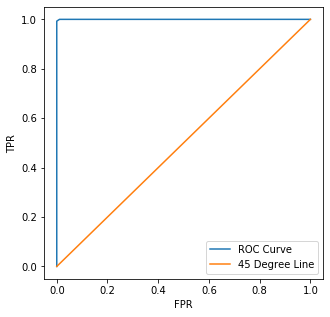

In [28]:
#Plot of TPR vs FPR
plt.figure(figsize=(5, 5))
plt.plot(df_ideal.fpr, df_ideal.tpr,label='ROC Curve')
plt.plot([0, 1], [0, 1],label='45 Degree Line')
plt.legend()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

#### In general, for ROC curves, we have the following image:

![Image](https://drek4537l1klr.cloudfront.net/grigorev/v-6/Figures/04_34.png)

#### AUC Score

As seen from above the area under the ROC curve varies from 0 to 1, with 1 being ideal and 0.5 being random. An AUC of 0.9 is indicative of a reasonably good model; 0.8 is alright, 0.7 is not very good, and 0.6 indicates quite poor performance. The score is indicative of how good the model separates positive and negative labels.

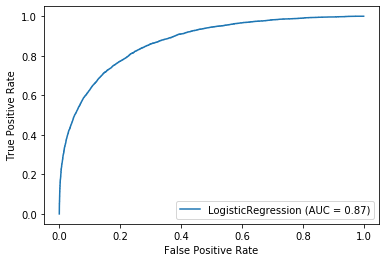

In [29]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg,X_test,y_test)
plt.show()

Our model has an AUC of 0.87!

### 3) K-Fold Cross Validation and Hyperparameter Tuning using GridSearchCV

It's possible to use all the available data to assess the quality of models and get more reliable validation results. We can simply perform validation multiple times.

First, we split the training dataset into a certain number of parts (say, three). Then we train a model on two parts and validate on the remaining one. We repeat this process three times, and at the end get three different scores. This is exactly the idea behind K-fold cross-validation.

![Image](https://drek4537l1klr.cloudfront.net/grigorev/v-6/Figures/04_38.png)

Usually, when working with machine learning models, we need to split our model into 3 sets (not 2, like done upto now), the training set, the validation set and the test set. The reason is because if we have just one single test set, we end up tuning our hyperparameters based on the metrics of the test set, and hence in a sense, our model is adapted to our test set lessening the reason for the test set in the first place - to test our model on data it has never seen. But because we are now splitting it into three parts, the training set may further get reduced, worsening the model. The solution is to use K-Fold Cross Validation on the test set, and reserve a part of the dataset for the final testing at the end. 

In [32]:
#Importing the required 
from sklearn.model_selection import cross_validate, KFold

#We are using KFold to split the dataset, but alternatively we could just specify integer values for cv
kf = KFold(5,shuffle=True,random_state=0)
cv_scores = cross_validate(logreg,X_train,y_train,cv=kf,scoring=['accuracy','roc_auc'])
cv_scores

{'fit_time': array([1.49119306, 1.47703028, 1.16217899, 1.33556509, 1.33875561]),
 'score_time': array([0.1350224 , 0.1065371 , 0.10792971, 0.10423994, 0.10479188]),
 'test_accuracy': array([0.84668806, 0.8481825 , 0.84734737, 0.84914949, 0.84395604]),
 'test_roc_auc': array([0.86967067, 0.87256227, 0.86974046, 0.86918609, 0.86681804])}

In [33]:
#Print the mean accuracy score and AUC score for all the splits

print('Mean accuracy score for the data: {0:0.4f}'.format(cv_scores['test_accuracy'].mean()))
print('Mean AUC score for the data: {0:0.4f}'.format(cv_scores['test_roc_auc'].mean()))

Mean accuracy score for the data: 0.8471
Mean AUC score for the data: 0.8696


We can now use this concept of Cross Validation to use **GridSearchCV** to find the best parameters for our Logistic Regression Model.

In [368]:
from sklearn.model_selection import GridSearchCV

#We are creating a dictionary of all the permutations of parameters we wish to try out for the model
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver' : ['liblinear','lbfgs','saga']}
#In the above grid, we will effectively be trying out 7*3 = 21 models

clf = GridSearchCV(LogisticRegression(),param_grid,cv=3,verbose=2)

#Fit the classifier to obtain the best model for our data. This may take some time!
clf.fit(X_train,y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV] C=0.001, solver=liblinear .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ C=0.001, solver=liblinear, total=   0.4s
[CV] C=0.001, solver=liblinear .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ........................ C=0.001, solver=liblinear, total=   0.4s
[CV] C=0.001, solver=liblinear .......................................
[CV] ........................ C=0.001, solver=liblinear, total=   0.4s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............................ C=0.001, solver=lbfgs, total=   0.5s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............................ C=0.001, solver=lbfgs, total=   0.5s
[CV] C=0.001, solver=lbfgs ...........................................
[CV] ............................ C=0.001, solver=lbfgs, total=   0.5s
[CV] C=0.001, solver=saga ............................................
[CV] ............................. C=0.001, solver=saga, total=   1.9s
[CV] C=0.001, solver=saga ............................................
[CV] ............................. C=0.001, solver=saga, total=   1.8s
[CV] C=0.001, solver=saga ............................................
[CV] .

[CV] ............................. C=1000, solver=lbfgs, total=   1.4s
[CV] C=1000, solver=saga .............................................
[CV] .............................. C=1000, solver=saga, total=   2.5s
[CV] C=1000, solver=saga .............................................
[CV] .............................. C=1000, solver=saga, total=   2.6s
[CV] C=1000, solver=saga .............................................
[CV] .............................. C=1000, solver=saga, total=   2.5s


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [357]:
#Let us check out the best parameters for our model
clf.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [361]:
#We now use the classifer with the best model to predict the labels for our test set and check its accuracy
y_pred_test_grid = clf.predict(X_test)
print('Accuracy score for test data: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_grid)))

Accuracy score for test data: 0.8489


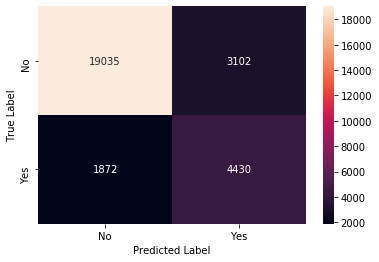

              precision    recall  f1-score   support

          No       0.91      0.86      0.88     22137
         Yes       0.59      0.70      0.64      6302

    accuracy                           0.83     28439
   macro avg       0.75      0.78      0.76     28439
weighted avg       0.84      0.83      0.83     28439



In [360]:
#Let us now check the confusion matrix and classification report for this model and compare it to our initial one
#Set the threshold value manually
threshold = 0.3

BoolArray=clf.predict_proba(X_test)[:,1]>=threshold
predictions_grid=np.array(['Yes' if val==True else 'No' for val in BoolArray])

#Plotting the Confusion Matrix
cm = confusion_matrix(y_test,predictions_grid)
cmdf=pd.DataFrame(cm,index=["No","Yes"],columns=["No","Yes"])
fig,ax=plt.subplots(1,1)
sns.heatmap(cmdf,annot=True,fmt='d',ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

#Printing the Classification Report
print(classification_report(y_test,predictions_grid))

### Conclusion

The final model after GridSearchCV is very comparable to the initial model we had. Accuracy is idenitical upto 4 decimal places but f1 score for "Yes" has increased while f1 score for "No" has decreased. Let's go ahead with the final model with a threshold value of 0.3.

### Save the Model

In [ ]:
#Save the model

lr = clf.best_estimator_
lr.fit(X_train,y_train)

import joblib #Install the library if you do not have it or import it from sklearn.externals
joblib.dump(lr,'LogReg_Model.pkl')